<a href="https://colab.research.google.com/github/LilianYou/Sea_Hero_Quest/blob/main/DemographicsAnalysis_shared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Characterizing self-reported navigation ability using demographic information

## Exploratary Analysis

### read data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/My Drive/Data/

/content/drive/.shortcut-targets-by-id/1pS1W_QFv_TreubUVne2-kLNgsBSGwhhw/Data


In [4]:
df_raw = pd.read_csv(r'2019user_cleaned.csv')

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909456 entries, 0 to 909455
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   uuid               909456 non-null  object 
 1   age                909456 non-null  float64
 2   education          909456 non-null  object 
 3   gender             909456 non-null  object 
 4   hand               909456 non-null  object 
 5   home_environment   909456 non-null  object 
 6   location           909456 non-null  object 
 7   navigating_skills  909456 non-null  object 
 8   sleep              909456 non-null  float64
 9   travel_time        909456 non-null  object 
dtypes: float64(2), object(8)
memory usage: 69.4+ MB


### Age & Sleep

In [6]:
df_raw.describe()

,age,sleep
count,909456.000000,909456.000000
mean,35.515352,7.097244
std,15.296664,1.333995
min,18.000000,1.000000
25%,21.000000,6.000000
50%,32.000000,7.000000
75%,48.000000,8.000000
max,70.000000,12.000000


In [7]:
df = df_raw.copy()[['age','education','gender','hand','home_environment','navigating_skills','sleep','travel_time']]

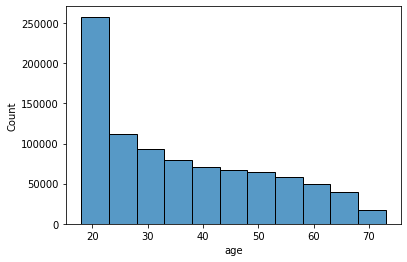

In [ ]:
sns.histplot(data=df,x="age",binwidth = 5)

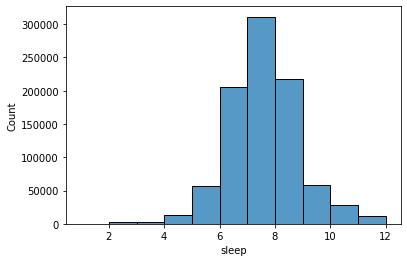

In [ ]:
sns.histplot(data=df,x="sleep",binwidth = 1)

In [ ]:
df[['age','sleep']].median()

age      32.0
sleep     7.0
dtype: float64

### Gender

In [ ]:
df["gender"].value_counts()/df.shape[0]

m    0.523502
f    0.476498
Name: gender, dtype: float64

### Education

In [8]:
#recode
df['education'] = df['education'].apply(lambda x: 'tertiary' if x=='college'or x == 'university' else 'secondary')
df['education'] = pd.Categorical(df['education'], 
                                 categories=['secondary','tertiary'], ordered=True)

In [9]:
df["education"].value_counts()/df.shape[0]

tertiary     0.647577
secondary    0.352423
Name: education, dtype: float64

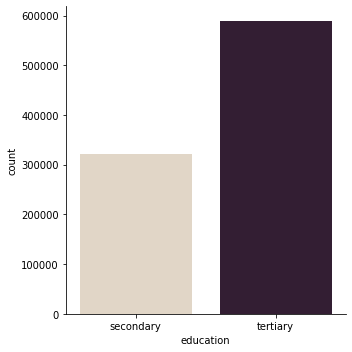

In [ ]:
sns.catplot(x="education", kind="count", palette="ch:.25", data=df)

### Handedness

In [ ]:
df["hand"].value_counts()/df.shape[0]

right    0.899195
left     0.100805
Name: hand, dtype: float64

### Home Environment

In [ ]:
df['home_environment'].value_counts()/df.shape[0]

city       0.311497
suburbs    0.309815
mixed      0.206841
rural      0.171847
Name: home_environment, dtype: float64

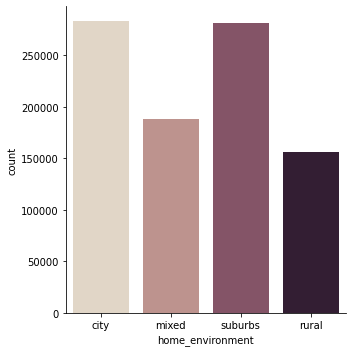

In [ ]:
sns.catplot(x="home_environment", kind="count", palette="ch:.25", data=df)

### Self-reported Navigating Skills (SRNS)

In [10]:
df['navigating_skills'] = pd.Categorical(df['navigating_skills'], 
                                 categories=['very-bad','bad','good','very-good'], 
                                 ordered=True)

In [11]:
df['navigating_skills'].value_counts()/df.shape[0]

good         0.558747
very-good    0.309199
bad          0.112090
very-bad     0.019964
Name: navigating_skills, dtype: float64

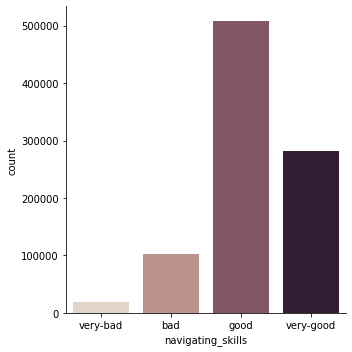

In [ ]:
sns.catplot(x="navigating_skills", kind="count", palette="ch:.25", data=df)

### Daily Commute Time

In [ ]:
df['travel_time'] = pd.Categorical(df['travel_time'], 
                                 categories=['less-30-mins','30-mins-to-1-hour','hour-plus'], 
                                 ordered=True)

In [ ]:
df['travel_time'].value_counts()/df.shape[0]

less-30-mins         0.393238
30-mins-to-1-hour    0.352557
hour-plus            0.254205
Name: travel_time, dtype: float64

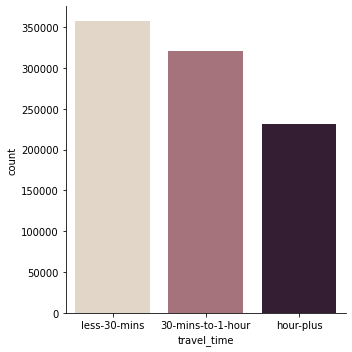

In [ ]:
sns.catplot(x="travel_time", kind="count", palette="ch:.25", data=df)

### Bivariate spearman correlation

In [ ]:
df.head()

,age,education,gender,hand,home_environment,navigating_skills,sleep,travel_time
0,68.0,tertiary,f,right,city,bad,8.0,less-30-mins
1,18.0,secondary,m,left,mixed,good,7.0,less-30-mins
2,18.0,secondary,m,left,city,very-good,7.0,hour-plus
3,21.0,tertiary,f,right,suburbs,good,7.0,30-mins-to-1-hour
4,36.0,tertiary,m,right,rural,very-good,5.0,30-mins-to-1-hour


In [13]:
df_model = df.copy()
recode_map = {"gender": {'f': 0,'m': 1},
                   "hand": {'right': 0,'left': 1},
                   "education":{"secondary":0, "tertiary":1},
                   "travel_time":{"less-30-mins":0, "30-mins-to-1-hour":1, "hour-plus":2},
                   "home_environment":{"rural":0,"suburbs":1,"mixed":1,"city":2}}
df_model = df_model.replace(recode_map)


In [15]:
df_model.head()

,age,education,gender,hand,home_environment,navigating_skills,sleep,travel_time
0,68.0,1,0,0,2,bad,8.0,0
1,18.0,0,1,1,1,good,7.0,0
2,18.0,0,1,1,2,very-good,7.0,2
3,21.0,1,0,0,1,good,7.0,1
4,36.0,1,1,0,0,very-good,5.0,1


In [18]:
print(stats.spearmanr(df_model.age,df_model.sleep))
print(stats.spearmanr(df_model.age,df_model.education))

SpearmanrResult(correlation=-0.21523497590034568, pvalue=0.0)
SpearmanrResult(correlation=0.19902337135036957, pvalue=0.0)


In [14]:
df_model.corr(method= 'spearman')

,age,education,gender,hand,home_environment,sleep,travel_time
age,1.000000,0.199023,-0.038304,-0.017071,-0.049480,-0.215235,-0.120294
education,0.199023,1.000000,-0.012156,-0.010738,0.012358,-0.098573,0.011680
gender,-0.038304,-0.012156,1.000000,0.031973,0.046558,-0.044463,0.098331
hand,-0.017071,-0.010738,0.031973,1.000000,-0.014665,0.005509,-0.012994
home_environment,-0.049480,0.012358,0.046558,-0.014665,1.000000,0.006560,0.058622
sleep,-0.215235,-0.098573,-0.044463,0.005509,0.006560,1.000000,-0.051843
travel_time,-0.120294,0.011680,0.098331,-0.012994,0.058622,-0.051843,1.000000


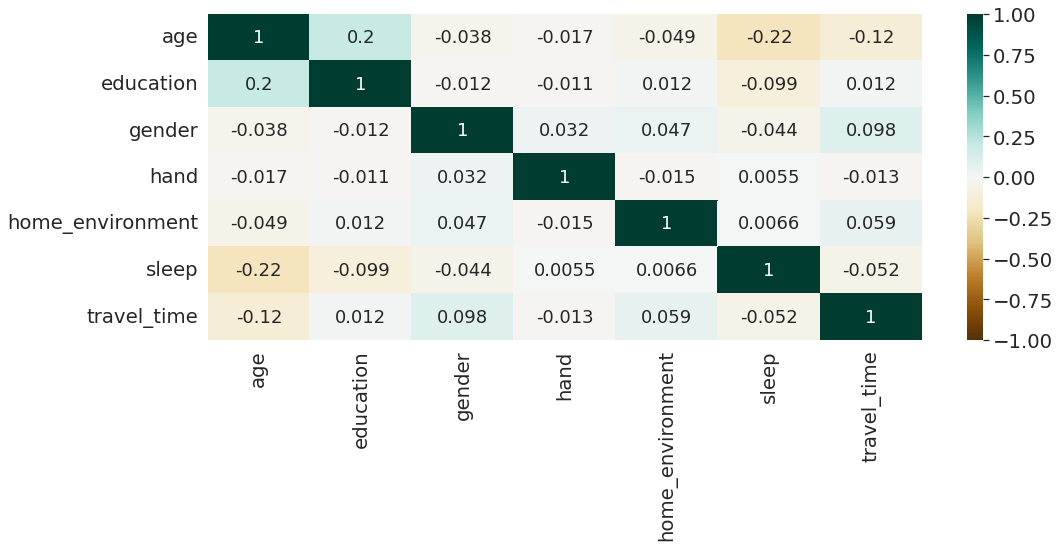

In [ ]:
# Heatmap
sns.set(font_scale=1.8)
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_model.corr('spearman'), vmin=-1, vmax=1, annot=True, annot_kws={"size":18}, cmap='BrBG')